In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

In [38]:
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver ='lbfgs', C = 10, max_iter=1000)
ans = softmax_reg.fit(X_train, y_train)


In [33]:
softmax_reg.predict_proba(X_test)
print(iris.target_names[0],iris.target_names[1],iris.target_names[2])

for idx,i in enumerate(softmax_reg.predict_proba(X_test)):
    print(idx, end=' ')
    for j in (i):
        print(f'[{j:.2f}]', end=' ')
    print()    

setosa versicolor virginica
0 [0.00] [0.02] [0.98] 
1 [0.00] [0.00] [1.00] 
2 [0.99] [0.01] [0.00] 
3 [1.00] [0.00] [0.00] 
4 [0.00] [0.11] [0.89] 
5 [0.00] [0.01] [0.99] 
6 [0.00] [0.04] [0.96] 
7 [0.99] [0.01] [0.00] 
8 [1.00] [0.00] [0.00] 
9 [0.00] [0.95] [0.05] 
10 [0.00] [0.99] [0.01] 
11 [0.99] [0.01] [0.00] 
12 [0.00] [0.00] [1.00] 
13 [0.99] [0.01] [0.00] 
14 [0.16] [0.84] [0.00] 
15 [0.00] [0.00] [1.00] 
16 [1.00] [0.00] [0.00] 
17 [0.00] [0.04] [0.96] 
18 [0.00] [1.00] [0.00] 
19 [1.00] [0.00] [0.00] 
20 [0.00] [0.00] [1.00] 
21 [1.00] [0.00] [0.00] 
22 [0.00] [0.08] [0.92] 
23 [0.00] [1.00] [0.00] 
24 [0.99] [0.01] [0.00] 
25 [0.00] [0.00] [1.00] 
26 [0.00] [0.26] [0.74] 
27 [0.00] [1.00] [0.00] 
28 [0.00] [0.87] [0.13] 
29 [0.00] [0.71] [0.29] 


In [39]:
!pip install pillow

# CNNBaseline.py

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

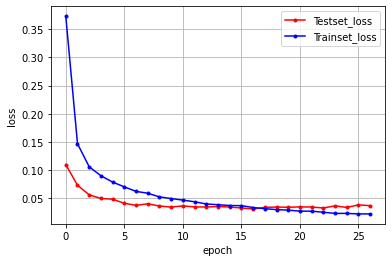

In [1]:
# %load CNNBaseline.py
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# CNN을 위한 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
